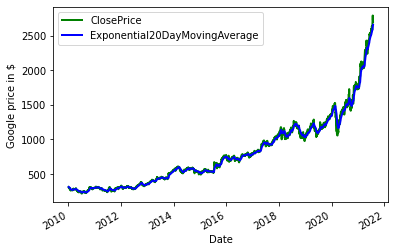

In [3]:
# Implementation of the exponential moving average

import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data

start_data = '2010-01-01'
end_data = '2021-08-01'
FILENAME = 'goog_data_2010_2021.pkl'

try:
    goog_data = pd.read_pickle(FILENAME)
except FileNotFoundError:
    goog_data = data.DataReader('GOOG', 'yahoo', start_data, end_data)
    goog_data.to_pickle(FILENAME)

close = goog_data['Close']

num_periods = 20
K = 2 / (num_periods + 1)
ema_p = 0
ema_values = []

for close_price in close:
    if (ema_p == 0):
        ema_p = close_price
    else:
        ema_p = (close_price - ema_p) * K + ema_p
    
    ema_values.append(ema_p)

goog_data = goog_data.assign(
    ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(
    Exponential20DayMovingAverage=pd.Series(ema_values, index=goog_data.index))
close_price = goog_data['ClosePrice']
ema = goog_data['Exponential20DayMovingAverage']

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema.plot(ax=ax1, color='b', lw=2., legend=True)
# plt.savefig('ema.png')
plt.show()
